In [8]:
!pip install mlxtend

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [111]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cps.csv')

In [112]:
df.head(5)

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [113]:
df = df.iloc[1: , :] #Remove first row

In [114]:
df = df.drop(['Timestamp', 'PS5'], axis=1) #ไม่ได้ใช้ และ ซ้ำซ้อน

In [115]:
df = df.fillna('ไม่เคย') # การที่ไม่สนใจจะตอบมีแนวโน้มสูงกว่าไม่เคยซื้อ

In [116]:
df.shape

(46, 40)

ขั้นตอนการทำ
1. ลบ Nan Row กับ Col Timestamp
2. ถ้าเจอ "ไม่" -> 0, ที่เหลือ -> 1
3. หา Co-existing ว่ากลุ่มไหนมักจะมาด้วยกัน

In [117]:
missing = df.isnull().sum()
print(missing)

playstation5                     0
เครื่องทำขนมปัง                  0
Ergonomic Wrist Rest             0
เครื่องอบผ้า                     0
เครื่องชงกาแฟแคปซูล              0
เก้าอี้ LA-Z-Boy                 0
เครื่องให้อาหารสัตว์อัตโนมัติ    0
บัตตาเลี่ยน                      0
แก้วเก็บความเย็น                 0
ลู่วิ่งออกกำลังกาย               0
Kindle                           0
เครื่องซักผ้า                    0
Bluetooth Speaker                0
ห้องน้ำแมวอัตโนมัติ              0
ทรายแมว                          0
ลำโพง pixel                      0
Logitech Mx Master 3 Mouse       0
ตุ๊กตา ty                        0
น้ำพุแมว                         0
Robot ดูดฝุ่น                    0
Mechanical keyboard              0
Nintendo switch                  0
หนังสือ python                   0
gaming chair                     0
Deskmat                          0
Dew - ไฟโรเซ่                    0
เทียนหอม jo malone               0
กระติกน้ำ 2 ลิตร                 0
ที่นอน memory form  

In [118]:
hot_encoded_df = df

In [119]:
def encode_units(x):
    if  'ไม่' in x:
        return 0
    else:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [77]:
hot_encoded_df.head()

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
3,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
5,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0


In [120]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.1, use_colnames=True)
#frequent_itemsets = apriori(hot_encoded_df, use_colnames=True)

In [121]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules['antecedents_len'] = rules['antecedents'].apply(lambda x:len(x))
rules['consequents_len'] = rules['consequents'].apply(lambda x:len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
0,(เครื่องอบผ้า),(แก้วเก็บความเย็น),0.130435,0.717391,0.130435,1.000000,1.393939,0.036862,inf,1,1
1,(แก้วเก็บความเย็น),(เครื่องอบผ้า),0.717391,0.130435,0.130435,0.181818,1.393939,0.036862,1.062802,1,1
2,(เครื่องอบผ้า),(เครื่องซักผ้า),0.130435,0.521739,0.130435,1.000000,1.916667,0.062382,inf,1,1
3,(เครื่องซักผ้า),(เครื่องอบผ้า),0.521739,0.130435,0.130435,0.250000,1.916667,0.062382,1.159420,1,1
4,(เครื่องอบผ้า),(Bluetooth Speaker),0.130435,0.739130,0.108696,0.833333,1.127451,0.012287,1.565217,1,1
...,...,...,...,...,...,...,...,...,...,...,...
781579,(หม้อทอดไร้น้ํามัน),"(Salmon Sashimi, Bluetooth Speaker, External H...",0.543478,0.130435,0.108696,0.200000,1.533333,0.037807,1.086957,1,10
781580,(Robot ดูดฝุ่น),"(Salmon Sashimi, Bluetooth Speaker, External H...",0.347826,0.108696,0.108696,0.312500,2.875000,0.070888,1.296443,1,10
781581,(เครื่องซักผ้า),"(Salmon Sashimi, Bluetooth Speaker, External H...",0.521739,0.108696,0.108696,0.208333,1.916667,0.051985,1.125858,1,10
781582,(ยาดม),"(Salmon Sashimi, Bluetooth Speaker, External H...",0.826087,0.108696,0.108696,0.131579,1.210526,0.018904,1.026350,1,10


In [130]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) &
       (rules['support'] >= 0.5) &
       (rules['antecedent support'] >= 0.5) &
       (rules['consequent support'] >= 0.5) &
       (rules['antecedents_len'] == 1) &
       (rules['consequents_len'] == 1)].sort_values(by=['lift'] ,ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
321,(พลาสเตอร์บรรเทาปวด ตราเสือ),(ยาดม),0.565217,0.826087,0.543478,0.961538,1.163968,0.076560,4.521739,1,1
320,(ยาดม),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.826087,0.565217,0.543478,0.657895,1.163968,0.076560,1.270903,1,1
355,(หม้อทอดไร้น้ํามัน),(External Harddisk),0.543478,0.804348,0.500000,0.920000,1.143784,0.062854,2.445652,1,1
354,(External Harddisk),(หม้อทอดไร้น้ํามัน),0.804348,0.543478,0.500000,0.621622,1.143784,0.062854,1.206522,1,1
317,(พลาสเตอร์บรรเทาปวด ตราเสือ),(External Harddisk),0.565217,0.804348,0.500000,0.884615,1.099792,0.045369,1.695652,1,1
316,(External Harddisk),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.804348,0.565217,0.500000,0.621622,1.099792,0.045369,1.149068,1,1
313,(Salmon Sashimi),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.847826,0.565217,0.521739,0.615385,1.088757,0.042533,1.130435,1,1
312,(พลาสเตอร์บรรเทาปวด ตราเสือ),(Salmon Sashimi),0.565217,0.847826,0.521739,0.923077,1.088757,0.042533,1.978261,1,1
191,(Bluetooth Speaker),(ยาดม),0.739130,0.826087,0.652174,0.882353,1.068111,0.041588,1.478261,1,1
190,(ยาดม),(Bluetooth Speaker),0.826087,0.739130,0.652174,0.789474,1.068111,0.041588,1.239130,1,1


KeyboardInterrupt: ignored

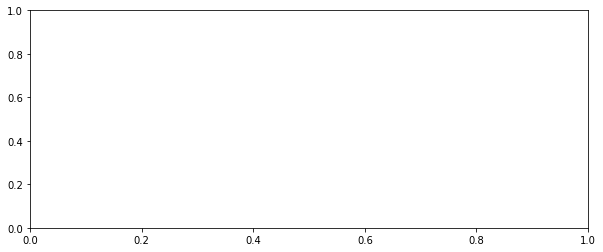

In [123]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [124]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [125]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [126]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [127]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3655 missing from current font.
  font.set_text(s

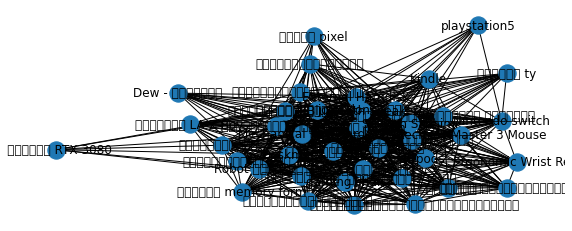

In [128]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()